<a href="https://colab.research.google.com/github/AmoghTantradi/Covid-19-Image-Detection/blob/master/Covid_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset : https://www.dropbox.com/s/v10dagvcdtqytyc/CovidDataset-20200427T133042Z-001.zip?dl=0

!wget https://www.dropbox.com/s/v10dagvcdtqytyc/CovidDataset-20200427T133042Z-001.zip?dl=0





--2020-10-19 04:46:15--  https://www.dropbox.com/s/v10dagvcdtqytyc/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/v10dagvcdtqytyc/CovidDataset-20200427T133042Z-001.zip [following]
--2020-10-19 04:46:16--  https://www.dropbox.com/s/raw/v10dagvcdtqytyc/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc353227513e7e08b4a6cdf92bc2.dl.dropboxusercontent.com/cd/0/inline/BBjUtYmBN3pqjJn07FMwNzmj4gBT6u9if6GjV6-U1MBUwvmuhcCHNE37G0CG6psiCfcqwLNXO2qGP3G3gfXNgdpUBR_IWvGcgZBk3Y2ab0URJH31RuatzxRBCsMgGMPPRHk/file# [following]
--2020-10-19 04:46:16--  https://uc353227513e7e08b4a6cdf92bc2.dl.dropboxusercontent.com/cd/0/inline/BBjUtYmBN3pqjJn07FMwNzmj4gBT6u9

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
TRAIN_PATH = 'CovidDataset/Train'
VAL_PATH = 'CovidDataset/Val'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
model = Sequential()
#we will be extracting 32 features from the first layer

#input shape is 224. It will have 224 height, width, and number of channels 
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))#convolutional layer with 32 filters. Kernal size of 3,3 is standard

#adding another layer
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))# further increases the receptive field

model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))


model.add(MaxPooling2D(pool_size=(2,2)))# further increases the receptive field

model.add(Dropout(0.25))#presents overfitting


model.add(Conv2D(128,(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))


#4 convolutional layers have been added

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
#train from scratch grad descent = adam


train_datagen = image.ImageDataGenerator(
    rescale = 1./255, #we are dividing by 255 to normalize our data
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),#converts the images to 224*224 images{standard choice}
    batch_size=32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),#converts the images to 224*224 images{standard choice}
    batch_size=32,
    class_mode = 'binary'
    
)

Found 60 images belonging to 2 classes.


In [ ]:


model.fit(train_generator,validation_data=validation_generator,epochs=80)

Epoch 1/80
7/7 [==============================] - 60s 9s/step - loss: 1.3918 - accuracy: 0.5714 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/80
7/7 [==============================] - 60s 9s/step - loss: 0.6595 - accuracy: 0.6116 - val_loss: 0.6520 - val_accuracy: 0.7000
Epoch 3/80
7/7 [==============================] - 60s 9s/step - loss: 0.5742 - accuracy: 0.6920 - val_loss: 0.4816 - val_accuracy: 0.8500
Epoch 4/80
7/7 [==============================] - 59s 8s/step - loss: 0.3695 - accuracy: 0.8259 - val_loss: 0.2476 - val_accuracy: 0.9500
Epoch 5/80
7/7 [==============================] - 59s 8s/step - loss: 0.2751 - accuracy: 0.8929 - val_loss: 0.1530 - val_accuracy: 0.9667
Epoch 6/80
7/7 [==============================] - 64s 9s/step - loss: 0.2430 - accuracy: 0.9107 - val_loss: 0.1814 - val_accuracy: 0.9667
Epoch 7/80
7/7 [==============================] - 60s 9s/step - loss: 0.2114 - accuracy: 0.9420 - val_loss: 0.0855 - val_accuracy: 0.9833
Epoch 8/80
7/7 [==================

In [ ]:
from keras.preprocessing import image

In [ ]:
y_actual = []
y_test = []

In [ ]:
for i in os.listdir('./CovidDataset/Val/Normal/'):
  img = image.load_img('./CovidDataset/Val/Normal/'+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
for i in os.listdir('./CovidDataset/Val/Covid/'):
  img = image.load_img('./CovidDataset/Val/Covid/'+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img) 
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_actual, y_test)

In [ ]:
import seaborn as sns

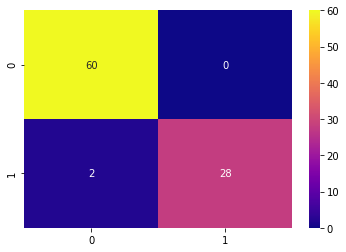

In [ ]:
sns.heatmap(cm, cmap='plasma', annot=True)

"""
As we can see here, my application has produced no false negatives on the test set

Since this aims to reduce this amount of false negatives, it has acheived its purpose.


"""

In [ ]:
model.save_weights('model_weights.h5')


with open ('model_architecture.json','w') as f:#saving the model architecture as json file
  f.write(model.to_json())




In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model,'././models/covidimaging')